In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from pathlib import Path
import pandas as pd

import random

In [3]:
core_pth = Path('/home/agrawalp2/prepositions'); assert core_pth.exists()
stupd_pth = Path('/mnt/dataset/agrawalp2/stupd_dataset'); assert stupd_pth.exists()

In [4]:
def is_static(x):
    static_preps = ['above', 'against_leaning', 'all_over', 'along_position', 'among', 'around_static', 
                   'behind', 'below', 'beside', 'between', 'in_front_of', 'inside', 'on', 'outside']
    
    dynamic_preps = ['against', 'along', 'around', 'by', 'down', 'from', 'into', 'into_crash', 'off', 'onto', 'out_of', 'over', 'through', 'towards', 'up', 'with']
    
    if x in static_preps: return True
    elif x in dynamic_preps: return False
    else: raise Exception("invalid relation input")
        

temporal_preps = ['after', 'beyond', 'before', 'by', 'between', 'during', 'while', 'around', 'at', 'since']
len(temporal_preps)

10

In [5]:
#what should be the length of all videos? variable?
#should be a multilabel dataset 

In [6]:
class sample_time_or_event:
    def __init__(self, annotations_path = stupd_pth/'annotations'):
        self.annotations_path = Path(annotations_path)
        self.annotation_files = [o for o in annotations_path.iterdir() if o.suffix.endswith('csv')]
        
        self.static_annotation_files = [o for o in self.annotation_files if is_static(o.stem)]
    def sample_event(self):
        f'event is a set of images representing a stretch of time. Can be static or dynamic preposition'
        relation = random.choice(self.annotation_files)
        df = pd.read_csv(relation)
        return relation, random.choice(range(0, len(df)))
        
    def sample_time(self):
        f'time represents a single frame. So time is represented by a static preposition only'
#         pass
        relation = random.choice(self.static_annotation_files)
        df = pd.read_csv(relation)
        return relation, random.choice(range(0, len(df)))
    

In [7]:
sampler = sample_time_or_event()

In [8]:
a, b = sampler.sample_event()
a,b

(PosixPath('/mnt/dataset/agrawalp2/stupd_dataset/annotations/around.csv'), 381)

In [9]:
total_len = 150 #5 seconds

In [19]:
class rules:
    def after(self):
        event_A_type = 'event'
        event_B_type = random.choice(['event', 'time_point'])
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        B_start = random.choice(range(0, self.vid_len - (event_len_B + event_len_A + 10))) #needs to be atleast a 10 frame gap between the two events
        A_start = random.choice(range(B_start+event_len_B + 10, self.vid_len))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
        
    def beyond(self):
        event_A_type = 'event'
        event_B_type = 'time_point'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        A_start = random.choice(range(0, self.vid_len - event_len_A))
        B_start = random.choice(range(A_start+1, A_start + event_len_A -1))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
    
    def before(self):
        event_A_type = 'event'
        event_B_type = random.choice(['event', 'time_point'])
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        B_start = random.choice(range(event_len_A + 10, self.vid_len - event_len_B)) #needs to be atleast a 10 frame gap between the two events
        A_start = random.choice(range(0, B_start -10-event_len_A+1))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
        
    
    def by(self):
        event_A_type = 'event'
        event_B_type = 'time_point'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        B_start = random.choice(range(event_len_A , self.vid_len - event_len_B)) 
        A_start = random.choice(range(0, B_start -event_len_A +1))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
    
    def between(self):
        
        event_A_type = 'event'
        event_B_type = random.choice(['event', 'time_point'])
        event_C_type = random.choice(['event', 'time_point'])
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        event_C_category, event_C_id = self.sampler.sample_event() if event_C_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        event_len_C = random.choice(range(15,45)) if event_C_type=='event' else 1
        
        #logic
        A_start = random.choice(range(event_len_B+1, self.vid_len - event_len_C -event_len_A-1))
        B_start = random.choice(range(0, A_start-event_len_B)) 
        C_start = random.choice(range(A_start+event_len_A, self.vid_len - event_len_C ))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B, C_start, C_start+event_len_C), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": event_C_id,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": event_C_category,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": event_C_type,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":[C_start, C_start + event_len_C], 
        }
    
    def during(self):
        event_A_type = random.choice(['event', 'time_point'])
        event_B_type = 'event'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_B = random.choice(range(16,45)) if event_B_type=='event' else 1
        event_len_A = random.choice(range(15,event_len_B)) if event_A_type=='event' else 1
        
        #logic
        B_start = random.choice(range(0, self.vid_len - event_len_B)) 
        A_start = random.choice(range(B_start, B_start+ event_len_B - event_len_A))
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
        
        
    def while_(self):
        event_A_type = 'event'
        event_B_type = 'event'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = event_len_A
        
         #logic
        A_start = random.choice(range(0, self.vid_len - event_len_A))
        B_start = A_start
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
    
    def around(self):
        event_A_type = 'event'
        event_B_type = 'time_point'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
         #logic
        happened_before_or_after = random.choice([0,1]) #is 0, A happened before B, else A happened after B
        short_duration = random.choice(range(1,self.short_duration))
        
        if not happened_before_or_after:
            A_start = random.choice(range(0, self.vid_len - event_len_A - event_len_B - short_duration))
            B_start = A_start+event_len_A+short_duration
        else: 
            B_start = random.choice(range(0, self.vid_len - event_len_B - event_len_A - short_duration))
            A_start = B_start+event_len_B+short_duration
            
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
    
    def at(self):
        event_A_type ='event'
        event_B_type = 'time_point'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        
        B_start = random.choice(range(0, self.vid_len - event_len_A))
        A_start = B_start
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
    
    def since(self):
        
        event_A_type ='event'
        event_B_type = 'time_point'
        
        event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
        event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
        event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
        event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
        #logic
        A_start = self.vid_len-event_len_A
        B_start = A_start
        
        return {
            "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
            "event_A_id": event_A_id, 
            "event_B_id": event_B_id, 
            "event_C_id": None,
            "event_A_category": event_A_category, 
            "event_B_category": event_B_category, 
            "event_C_category": None,
            "event_A_type": event_A_type, 
            "event_B_type": event_B_type, 
            "event_C_type": None,
            "event_A_start_end": [A_start, A_start +event_len_A],
            "event_B_start_end": [B_start, B_start + event_len_B], 
            "event_C_start_end":None, 
        }
        

In [21]:
df = pd.DataFrame(columns = ["relation", 
                             "event_A_id", "event_B_id", "event_C_id",
                             "event_A_category", "event_B_category", "event_C_category",
                             "event_A_type", "event_B_type", "event_C_type",
                             "event_A_start_end", "event_B_start_end", "event_C_start_end"])

class create_temporal_dataset(rules):
    def __init__(self, df_to_populate, total_vid_len = 150, short_duration_pct = 20 ):
        self.df = df_to_populate
        self.vid_len = total_vid_len
        
        self.relations = temporal_preps
        self.short_duration = int(short_duration_pct*self.vid_len/100)
        self.sampler = sample_time_or_event()
    
    def generate_df(self):
        for i in range(5000):
            if i%10 == 0: print('|', end = '')
            if i%100 ==0: print('\n')
            self.df = self.df.append(self.after(), ignore_index = True)
            self.df = self.df.append(self.beyond(), ignore_index = True)
            self.df = self.df.append(self.before(), ignore_index = True)
            self.df = self.df.append(self.by(), ignore_index = True)
            self.df = self.df.append(self.between(), ignore_index = True)
            self.df = self.df.append(self.during(), ignore_index = True)
            self.df = self.df.append(self.while_(), ignore_index = True)
            self.df = self.df.append(self.around(), ignore_index = True)
            self.df = self.df.append(self.at(), ignore_index = True)
            self.df = self.df.append(self.since(), ignore_index = True)
        
        self.df.to_csv(stupd_pth/'annotations_temporal.csv')
        
        
        
            
    def generate_output(self, A_start, A_end, B_start, B_end, C_start = None, C_end = None):
        res = []
        if C_start is not None and C_end is not None:
            if A_end<=C_start and A_start>=B_end: res.append('between')
        else:
            if A_start> B_end: res.append('after')
            if A_start<B_start and A_end>B_end: res.append('beyond')
            if A_end <B_start: res.append('before')
            if A_end<=B_start: res.append('by')

            if B_start<=A_start and B_end>=A_end: res.append('during')
            if A_start == B_start and A_end == B_end: res.append('while')

            if A_end < B_start: # A before B 
                if B_start - A_end < self.short_duration: res.append('around')
            elif A_start>B_end: #A after B 
                if A_start - B_end < self.short_duration: res.append('around')

            if A_start == B_start and B_end-B_start==1: res.append('at')
            if A_start == B_start and A_end == self.vid_len: res.append('since')
            
        for r in res: assert r in self.relations
        return res
    
#     def after(self):
#         event_A_type = 'event'
#         event_B_type = random.choice(['event', 'time_point'])
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
#         B_start = random.choice(range(0, self.vid_len - (event_len_B + event_len_A + 10))) #needs to be atleast a 10 frame gap between the two events
#         A_start = random.choice(range(B_start+event_len_B + 10, self.vid_len))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
        
#     def beyond(self):
#         event_A_type = 'event'
#         event_B_type = 'time_point'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
#         A_start = random.choice(range(0, self.vid_len - event_len_A))
#         B_start = random.choice(range(A_start+1, A_start + event_len_A -1))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
    
#     def before(self):
#         event_A_type = 'event'
#         event_B_type = random.choice(['event', 'time_point'])
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
#         B_start = random.choice(range(event_len_A + 10, self.vid_len - event_len_B)) #needs to be atleast a 10 frame gap between the two events
#         A_start = random.choice(range(0, B_start -10-event_len_A))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
        
    
#     def by(self):
#         event_A_type = 'event'
#         event_B_type = 'time_point'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
#         B_start = random.choice(range(event_len_A , self.vid_len - event_len_B)) 
#         A_start = random.choice(range(0, B_start -event_len_A))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
    
#     def between(self):
        
#         event_A_type = 'event'
#         event_B_type = random.choice(['event', 'time_point'])
#         event_C_type = random.choice(['event', 'time_point'])
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
#         event_C_category, event_C_id = self.sampler.sample_event() if event_C_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
#         event_len_C = random.choice(range(15,45)) if event_C_type=='event' else 1
        
#         #logic
#         A_start = random.choice(range(event_len_B+1, self.vid_len - event_len_C -event_len_A-1))
#         B_start = random.choice(range(0, A_start-event_len_B)) 
#         C_start = random.choice(range(A_start+event_len_A, self.vid_len - event_len_C ))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B, C_start, C_start+event_len_C), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": event_C_id,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": event_C_category,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": event_C_type,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":[C_start, C_start + event_len_C], 
#         }
    
#     def during(self):
#         event_A_type = random.choice(['event', 'time_point'])
#         event_B_type = 'event'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
#         event_len_A = random.choice(range(15,event_len_B)) if event_A_type=='event' else 1
        
#         #logic
#         B_start = random.choice(range(0, self.vid_len - event_len_B)) 
#         A_start = random.choice(range(B_start, B_start+ event_len_B - event_len_A))
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
        
        
#     def while_(self):
#         event_A_type = 'event'
#         event_B_type = 'event'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = event_len_A
        
#          #logic
#         A_start = random.choice(range(0, self.vid_len - event_len_A))
#         B_start = A_start
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
    
#     def around(self):
#         event_A_type = 'event'
#         event_B_type = 'time_point'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#          #logic
#         happened_before_or_after = random.choice([0,1]) #is 0, A happened before B, else A happened after B
#         short_duration = random.choice(range(1,self.short_duration))
        
#         if not happened_before_or_after:
#             A_start = random.choice(range(0, self.vid_len - event_len_A - event_len_B - short_duration))
#             B_start = A_start+event_len_A+short_duration
#         else: 
#             B_start = random.choice(range(0, self.vid_len - event_len_B - event_len_A - short_duration))
#             A_start = B_start+event_len_B+short_duration
            
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
    
#     def at(self):
#         event_A_type ='event'
#         event_B_type = 'time_point'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
        
#         B_start = random.choice(range(0, self.vid_len - event_len_A))
#         A_start = B_start
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
    
#     def since(self):
        
#         event_A_type ='event'
#         event_B_type = 'time_point'
        
#         event_A_category, event_A_id = self.sampler.sample_event() if event_A_type=='event' else self.sampler.sample_time()
#         event_B_category, event_B_id = self.sampler.sample_event() if event_B_type=='event' else self.sampler.sample_time()
        
#         event_len_A = random.choice(range(15,45)) if event_A_type=='event' else 1
#         event_len_B = random.choice(range(15,45)) if event_B_type=='event' else 1
        
#         #logic
#         A_start = self.vid_len-event_len_A
#         B_start = A_start
        
#         return {
#             "relation": self.generate_output(A_start, A_start +event_len_A, B_start, B_start + event_len_B), 
#             "event_A_id": event_A_id, 
#             "event_B_id": event_B_id, 
#             "event_C_id": None,
#             "event_A_category": event_A_category, 
#             "event_B_category": event_B_category, 
#             "event_C_category": None,
#             "event_A_type": event_A_type, 
#             "event_B_type": event_B_type, 
#             "event_C_type": None,
#             "event_A_start_end": [A_start, A_start +event_len_A],
#             "event_B_start_end": [B_start, B_start + event_len_B], 
#             "event_C_start_end":None, 
#         }
        

In [22]:
# gen = create_temporal_dataset(df)
# gen.generate_df()

|
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
||||||||||
|||||||||

In [4]:
df = pd.read_csv(stupd_pth/'annotations_temporal.csv')


In [5]:
len(df)

50000

In [6]:
df

,Unnamed: 0,relation,event_A_id,event_B_id,event_C_id,event_A_category,event_B_category,event_C_category,event_A_type,event_B_type,event_C_type,event_A_start_end,event_B_start_end,event_C_start_end
0,0,['after'],3782,4751,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,time_point,NaN,"[117, 151]","[11, 12]",NaN
1,1,['beyond'],3830,4958,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,time_point,NaN,"[73, 113]","[97, 98]",NaN
2,2,"['before', 'by']",2301,447,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,event,NaN,"[11, 43]","[87, 118]",NaN
3,3,"['before', 'by', 'around']",2787,2247,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,time_point,NaN,"[13, 47]","[69, 70]",NaN
4,4,['between'],1130,2644,3872.0,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,event,time_point,event,"[26, 48]","[7, 8]","[109, 147]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,['during'],2861,3725,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,event,NaN,"[58, 82]","[55, 97]",NaN
49996,49996,"['during', 'while', 'at']",1488,2995,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,event,NaN,"[0, 16]","[0, 16]",NaN
49997,49997,"['after', 'around']",1418,989,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,time_point,NaN,"[23, 65]","[17, 18]",NaN
49998,49998,['at'],994,231,NaN,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,/mnt/dataset/agrawalp2/stupd_dataset/annotatio...,NaN,event,time_point,NaN,"[112, 139]","[112, 113]",NaN


In [26]:
ctr = {}
for relations in df['relation']:
#     print(relations)
    for relation in eval(relations):
        if relation in ctr: ctr[relation]+=1
        else: ctr[relation]=1
ctr['at']-=5000
ctr

{'after': 7486,
 'beyond': 5000,
 'before': 12316,
 'by': 12514,
 'around': 12028,
 'between': 5000,
 'during': 10000,
 'while': 5000,
 'at': 10806,
 'since': 5000}

In [27]:
ctr['at']-=5000
ctr_sum = sum(ctr.values())
for i in ctr: ctr[i]=ctr[i]/ctr_sum*100

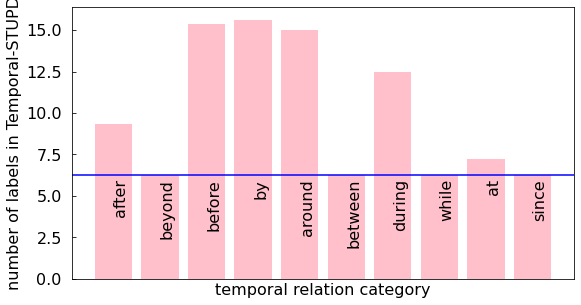

In [28]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})



fig, ax = plt.subplots()
labels = list(ctr.keys())

fig.set_size_inches(9, 5)

ax.bar(ctr.keys(), ctr.values(), color = 'pink')
ax.set_xticklabels(labels, rotation=90, ha='left')

ax.tick_params(axis="y",direction="in", pad=10)
ax.tick_params(axis="x",direction="in", pad=-100, bottom = False, which = 'major')
ax.axhline(y = 5000*100/ctr_sum, color = 'blue')

ax.set_ylabel ('number of labels in Temporal-STUPD')
ax.set_xlabel('temporal relation category')
fig.savefig(core_pth/'experiments/temporal_relation_distribution.png', bbox_inches = 'tight')
# ax.show()